# HEART DISEASE PREDICTION USING LSTM MODEL

## 1. Loading the Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
dataset = pd.read_csv('heart_disease_prediction.csv')

In [3]:
dataset

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246017,Virgin Islands,Male,Very good,0.0,0.0,Within past 2 years (1 year but less than 2 ye...,Yes,6.0,None of them,No,...,1.78,102.06,32.28,Yes,No,No,No,"Yes, received tetanus shot but not sure what type",No,No
246018,Virgin Islands,Female,Fair,0.0,7.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.93,90.72,24.34,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
246019,Virgin Islands,Male,Good,0.0,15.0,Within past year (anytime less than 12 months ...,Yes,7.0,1 to 5,No,...,1.68,83.91,29.86,Yes,Yes,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,Yes
246020,Virgin Islands,Female,Excellent,2.0,2.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.70,83.01,28.66,No,Yes,Yes,No,"Yes, received tetanus shot but not sure what type",No,No


In [4]:
columns_to_drop = ['State', 'LastCheckupTime', 'RaceEthnicityCategory']
dataset = dataset.drop(columns_to_drop, axis=1)

In [5]:
dataset

,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Female,Very good,4.0,0.0,Yes,9.0,None of them,No,No,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Male,Very good,0.0,0.0,Yes,6.0,None of them,No,No,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Male,Very good,0.0,0.0,No,8.0,"6 or more, but not all",No,No,No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Female,Fair,5.0,0.0,Yes,9.0,None of them,No,No,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Female,Good,3.0,15.0,Yes,5.0,1 to 5,No,No,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246017,Male,Very good,0.0,0.0,Yes,6.0,None of them,No,No,No,...,1.78,102.06,32.28,Yes,No,No,No,"Yes, received tetanus shot but not sure what type",No,No
246018,Female,Fair,0.0,7.0,Yes,7.0,None of them,No,No,No,...,1.93,90.72,24.34,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
246019,Male,Good,0.0,15.0,Yes,7.0,1 to 5,No,No,Yes,...,1.68,83.91,29.86,Yes,Yes,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,Yes
246020,Female,Excellent,2.0,2.0,Yes,7.0,None of them,No,No,No,...,1.70,83.01,28.66,No,Yes,Yes,No,"Yes, received tetanus shot but not sure what type",No,No


## 2. Data Preprocessing 

In [6]:
dataset = dataset.fillna(0)

X = dataset.drop('HadHeartAttack', axis=1)
y = dataset['HadHeartAttack']

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = label_encoder.fit_transform(X[col])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
dataset

,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Female,Very good,4.0,0.0,Yes,9.0,None of them,No,No,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Male,Very good,0.0,0.0,Yes,6.0,None of them,No,No,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Male,Very good,0.0,0.0,No,8.0,"6 or more, but not all",No,No,No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Female,Fair,5.0,0.0,Yes,9.0,None of them,No,No,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Female,Good,3.0,15.0,Yes,5.0,1 to 5,No,No,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246017,Male,Very good,0.0,0.0,Yes,6.0,None of them,No,No,No,...,1.78,102.06,32.28,Yes,No,No,No,"Yes, received tetanus shot but not sure what type",No,No
246018,Female,Fair,0.0,7.0,Yes,7.0,None of them,No,No,No,...,1.93,90.72,24.34,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
246019,Male,Good,0.0,15.0,Yes,7.0,1 to 5,No,No,Yes,...,1.68,83.91,29.86,Yes,Yes,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,Yes
246020,Female,Excellent,2.0,2.0,Yes,7.0,None of them,No,No,No,...,1.70,83.01,28.66,No,Yes,Yes,No,"Yes, received tetanus shot but not sure what type",No,No


## 3. Data Visualization

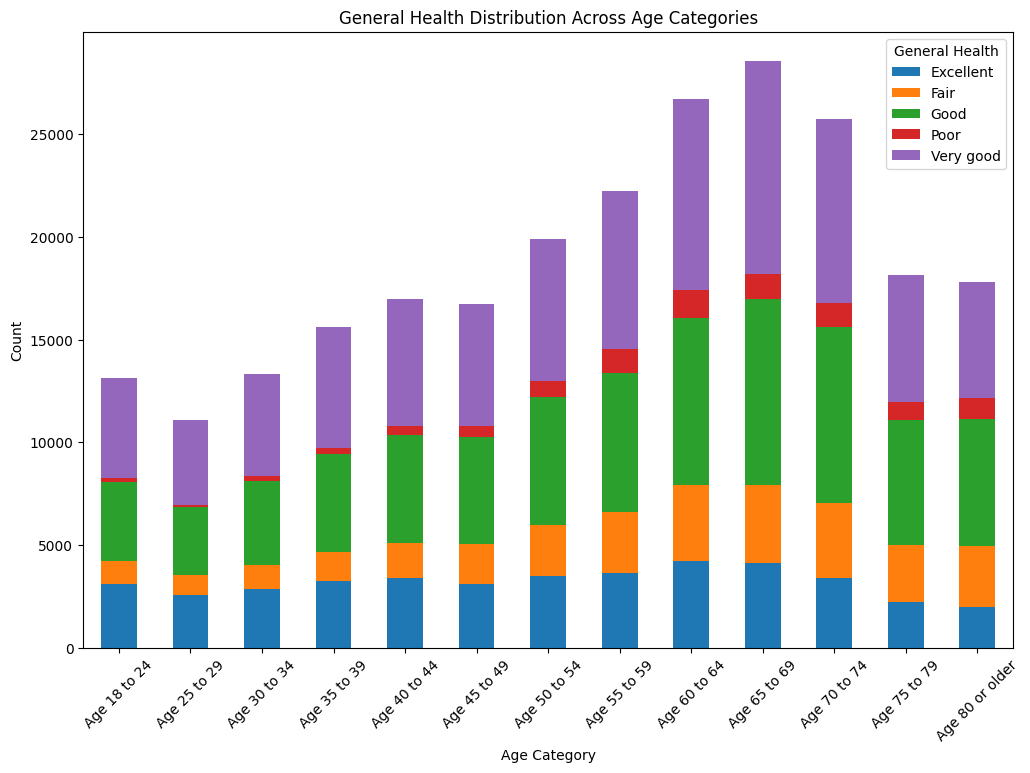

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

age_health_counts = dataset.groupby(['AgeCategory', 'GeneralHealth']).size().unstack()

age_health_counts.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('General Health Distribution Across Age Categories')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.xticks(rotation=45) 
plt.legend(title='General Health')
plt.show()


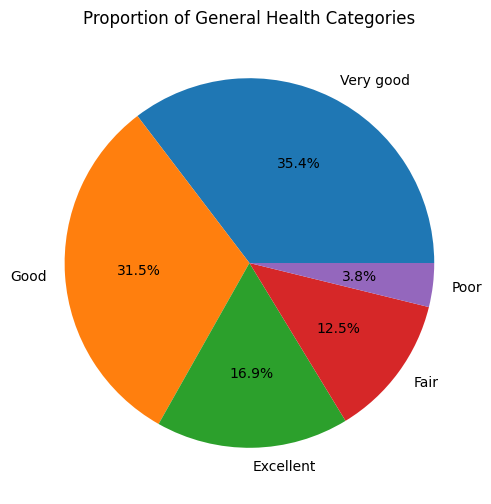

In [9]:
general_health_counts = dataset['GeneralHealth'].value_counts()
general_health_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 6))
plt.title('Proportion of General Health Categories')
plt.ylabel('')
plt.show()


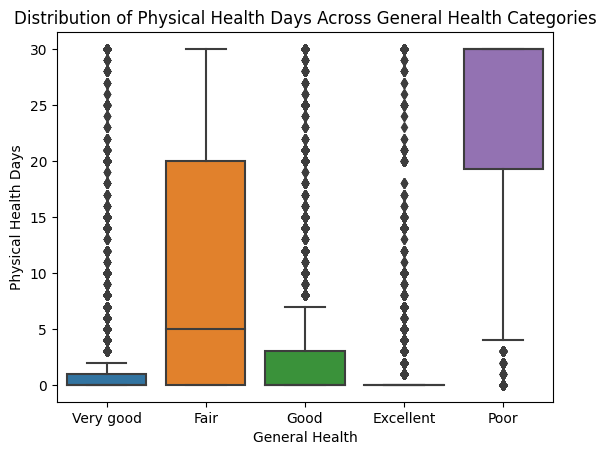

In [10]:
sns.boxplot(x='GeneralHealth', y='PhysicalHealthDays', data=dataset)
plt.title('Distribution of Physical Health Days Across General Health Categories')
plt.xlabel('General Health')
plt.ylabel('Physical Health Days')
plt.show()

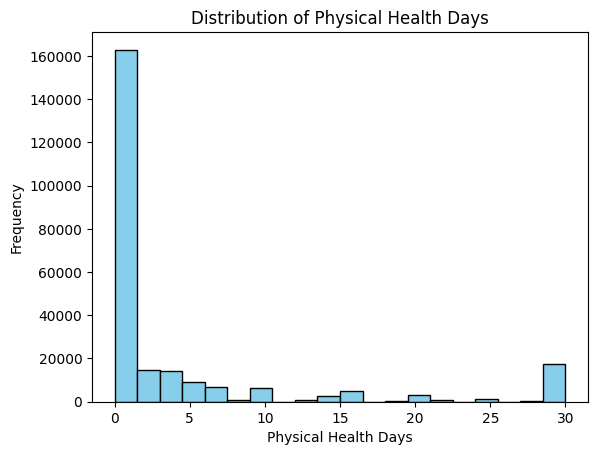

In [11]:
plt.hist(dataset['PhysicalHealthDays'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Physical Health Days')
plt.xlabel('Physical Health Days')
plt.ylabel('Frequency')
plt.show()

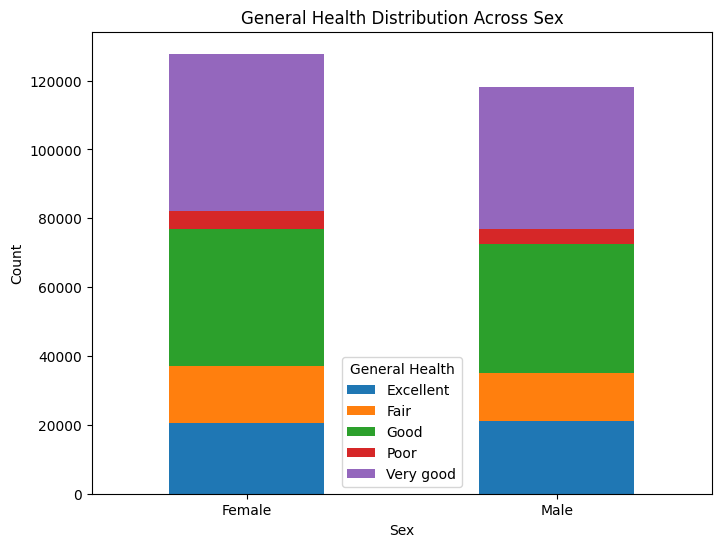

In [12]:
sex_health_counts = dataset.groupby(['Sex', 'GeneralHealth']).size().unstack()
sex_health_counts.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('General Health Distribution Across Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='General Health')
plt.show()

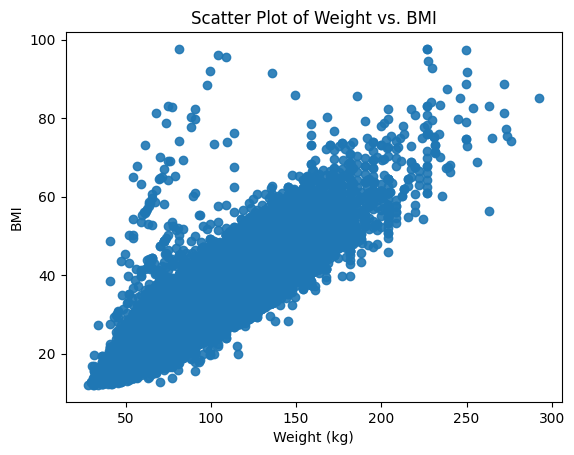

In [13]:
plt.scatter(dataset['WeightInKilograms'], dataset['BMI'], alpha=0.9)
plt.title('Scatter Plot of Weight vs. BMI')
plt.xlabel('Weight (kg)')
plt.ylabel('BMI')
plt.show()

In [14]:
X

,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,PhysicalActivities,SleepHours,RemovedTeeth,HadAngina,HadStroke,HadAsthma,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,0,4,4.0,0.0,1,9.0,3,0,0,0,...,1.60,71.67,27.99,0,0,1,1,1,0,0
1,1,4,0.0,0.0,1,6.0,3,0,0,0,...,1.78,95.25,30.13,0,0,1,1,2,0,0
2,1,4,0.0,0.0,0,8.0,1,0,0,0,...,1.85,108.86,31.66,1,0,0,1,0,0,2
3,0,1,5.0,0.0,1,9.0,3,0,0,0,...,1.70,90.72,31.32,0,0,1,1,0,0,2
4,0,2,3.0,15.0,1,5.0,0,0,0,0,...,1.55,79.38,33.07,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246017,1,4,0.0,0.0,1,6.0,3,0,0,0,...,1.78,102.06,32.28,1,0,0,0,2,0,0
246018,0,1,0.0,7.0,1,7.0,3,0,0,0,...,1.93,90.72,24.34,0,0,0,0,0,0,2
246019,1,2,0.0,15.0,1,7.0,0,0,1,0,...,1.68,83.91,29.86,1,1,1,1,2,0,2
246020,0,0,2.0,2.0,1,7.0,3,0,0,0,...,1.70,83.01,28.66,0,1,1,0,2,0,0


In [15]:
y

array([0, 0, 0, ..., 0, 0, 1])

## 4. Correlation Matrix

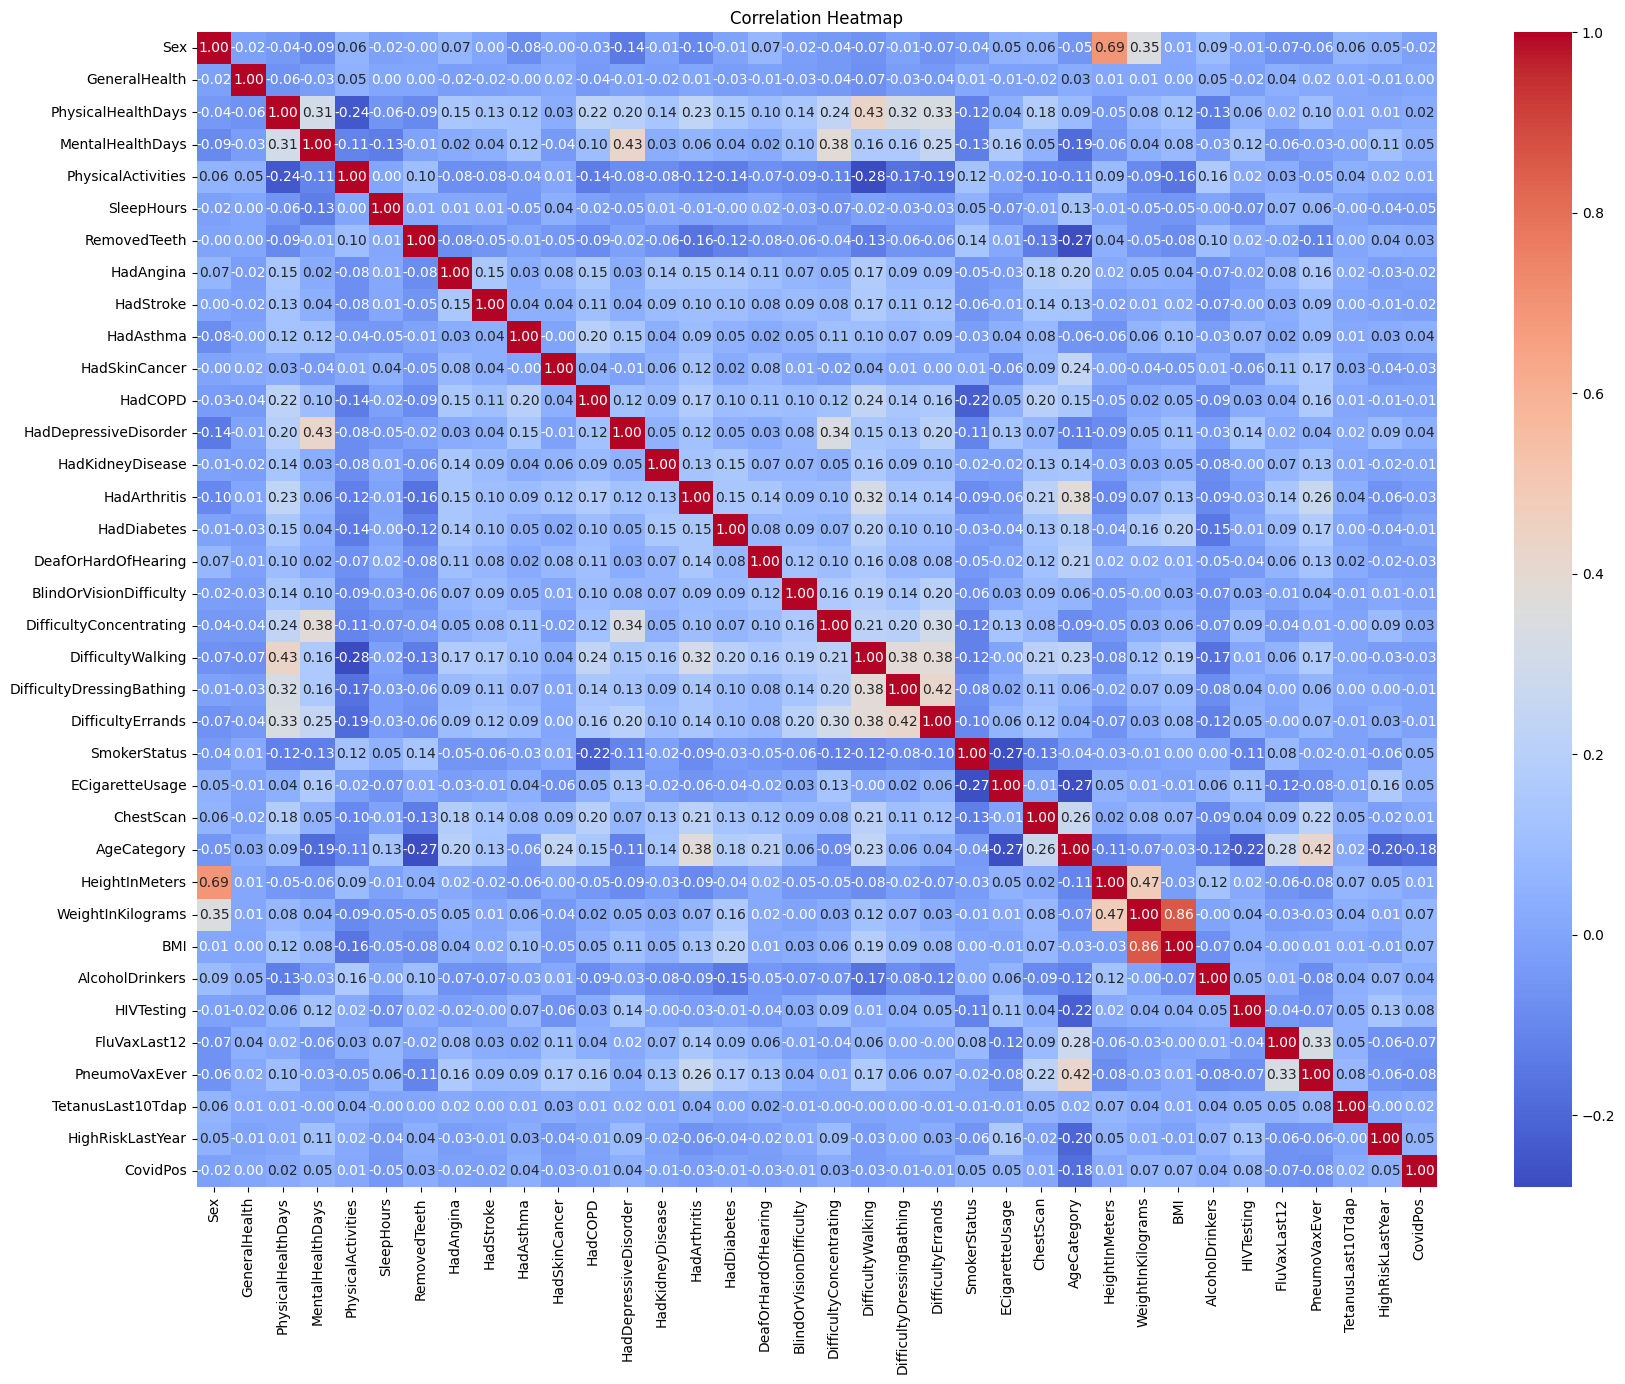

In [16]:
import matplotlib.pyplot as plt
corr_matrix = X.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

## 5. Model Evaluation (LSTM Model)

In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_reshaped.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_data=(X_test_reshaped, y_test))

loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

Epoch 1/10
6151/6151 [==============================] - 280s 45ms/step - loss: 0.1716 - accuracy: 0.9449 - val_loss: 0.1662 - val_accuracy: 0.9465
Epoch 2/10
6151/6151 [==============================] - 307s 50ms/step - loss: 0.1589 - accuracy: 0.9451 - val_loss: 0.1550 - val_accuracy: 0.9465
Epoch 3/10
6151/6151 [==============================] - 271s 44ms/step - loss: 0.1545 - accuracy: 0.9453 - val_loss: 0.1506 - val_accuracy: 0.9468
Epoch 4/10
6151/6151 [==============================] - 271s 44ms/step - loss: 0.1524 - accuracy: 0.9459 - val_loss: 0.1513 - val_accuracy: 0.9462
Epoch 5/10
6151/6151 [==============================] - 270s 44ms/step - loss: 0.1506 - accuracy: 0.9460 - val_loss: 0.1510 - val_accuracy: 0.9470
Epoch 6/10
6151/6151 [==============================] - 260s 42ms/step - loss: 0.1500 - accuracy: 0.9464 - val_loss: 0.1485 - val_accuracy: 0.9476
Epoch 7/10
6151/6151 [==============================] - 262s 43ms/step - loss: 0.1492 - accuracy: 0.9467 - val_loss: 0

## 6. Confusion Matrix

1538/1538 [==============================] - 22s 14ms/step


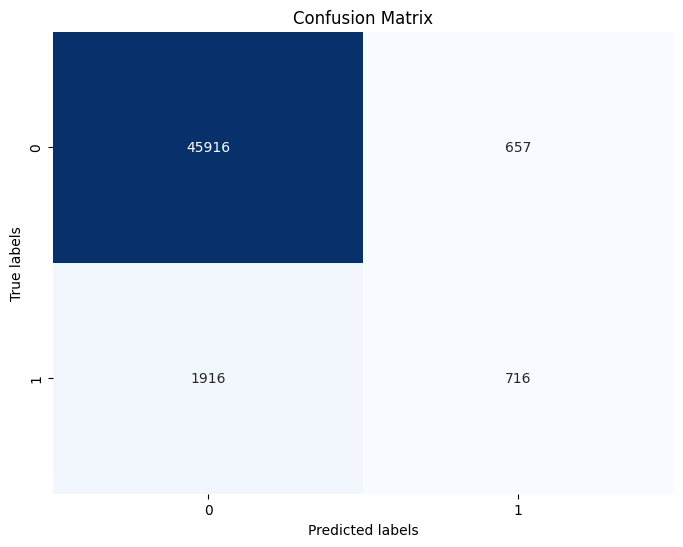

In [18]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

y_pred_prob = model.predict(X_test_reshaped)
y_pred = np.round(y_pred_prob).astype(int)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## 7. Classification Report

In [19]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     46573
           1       0.52      0.27      0.36      2632

    accuracy                           0.95     49205
   macro avg       0.74      0.63      0.67     49205
weighted avg       0.94      0.95      0.94     49205

